![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

 <h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Redes Neuronales para Clasificación Multiclase

# Se cargan las bibliotecas necesarias

In [ ]:
mport numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

# Se crean cinco blobs con los centros indicados
### *random_state* es un número semilla para el generador de aleatorios
### *cluster_std* indica qué tan dispersos se encuentran los datos alrededor de los centros
### Se tienen dos features en este dataset

In [ ]:
# las etiquetas se asignan durante la creación de los centros
n_pts = 5000
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)

# Se tienen etiquetas de 0 hasta 4 para los cinco centros

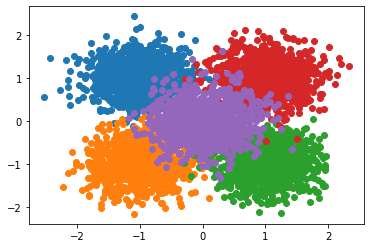

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

# Las etiquetas numéricas se exprean en One-Hot Encoding

In [ ]:
print(y)
y_cat = to_categorical(y, 5)
print(y_cat)

[4 4 4 ... 2 2 3]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


# Dividimos el dataset en set de entrenamiento y de prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[1:])

(4000, 2)
(1000, 2)
(2,)


# Se prepara una capa oculta con 32 neuronas, 2 entradas y una capa de salida con 5 neuronas y activación Softmax

In [ ]:
model = Sequential()
model.add(Dense(units = 32, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(units = 5, activation='softmax'))
model.compile(Adam(lr=0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(X, y_cat, verbose=2, batch_size = 50, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
100/100 - 1s - loss: 0.2740 - accuracy: 0.9016 - val_loss: 0.1895 - val_accuracy: 0.9270 - 1s/epoch - 13ms/step
Epoch 2/100
100/100 - 0s - loss: 0.2245 - accuracy: 0.9176 - val_loss: 0.1897 - val_accuracy: 0.9330 - 222ms/epoch - 2ms/step
Epoch 3/100
100/100 - 0s - loss: 0.2182 - accuracy: 0.9178 - val_loss: 0.2212 - val_accuracy: 0.9190 - 210ms/epoch - 2ms/step
Epoch 4/100
100/100 - 0s - loss: 0.2070 - accuracy: 0.9206 - val_loss: 0.2011 - val_accuracy: 0.9280 - 247ms/epoch - 2ms/step
Epoch 5/100
100/100 - 0s - loss: 0.2219 - accuracy: 0.9188 - val_loss: 0.1829 - val_accuracy: 0.9310 - 228ms/epoch - 2ms/step
Epoch 6/100
100/100 - 0s - loss: 0.2144 - accuracy: 0.9224 - val_loss: 0.1732 - val_accuracy: 0.9270 - 235ms/epoch - 2ms/step
Epoch 7/100
100/100 - 0s - loss: 0.2066 - accuracy: 0.9252 - val_loss: 0.1965 - val_accuracy: 0.9250 - 223ms/epoch - 2ms/step
Epoch 8/100
100/100 - 0s - loss: 0.2151 - accuracy: 0.9222 - val_loss: 0.1721 - val_accuracy: 0.9370 - 290ms/epoch - 3ms

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

32/32 [==============================] - 0s 3ms/step - loss: 0.1713 - accuracy: 0.9320
Test loss: 0.17128925025463104
Test accuracy: 0.9319999814033508


# Verificamos la clasificación de manera gráfica

In [ ]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = np.argmax(model.predict(grid), axis=-1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 2ms/step


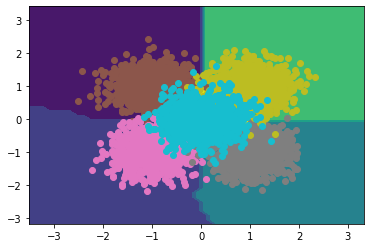

In [ ]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

# Modificación 1
### Se agrega una segunda capa oculta de 16 nodos

In [ ]:
model = Sequential()
model.add(Dense(units = 32, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(units = 16, activation='relu'))
model.add(Dense(units = 5, activation='softmax'))
model.compile(Adam(lr=0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X, y_cat, verbose=2, batch_size = 50, epochs=100, validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Modificación 2
### Se agrega otra capa oculta respecto a la modificación anterior

In [ ]:
model = Sequential()
model.add(Dense(units = 32, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(units = 16, activation='relu'))
model.add(Dense(units = 5, activation='softmax'))
model.compile(Adam(lr=0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X, y_cat, verbose=2, batch_size = 50, epochs=100, validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Modificación #3
### Se mantiene una sola capa oculta, pero de mayor número de nodos

In [ ]:
model = Sequential()
model.add(Dense(units = 64, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(units = 5, activation='softmax'))
model.compile(Adam(lr=0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X, y_cat, verbose=2, batch_size = 50, epochs=100, validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Gracias por la atención